In [32]:
import string
import time
from collections import defaultdict

import pulp

from rnapolis.common import BpSeq, Entry

brackets = "([{<" + string.ascii_uppercase
instances = []

for j in range(len(brackets)):
    entries = []

    for i in range(j + 1):
        entries.append(Entry(i + 1, "C", i + j + 2))
        entries.append(Entry(i + j + 2, "G", i + 1))

    bpseq = BpSeq(sorted(entries))
    instances.append(bpseq)


fcfs_times = []
solver_times = defaultdict(list)

instances = instances[:16]

for instance in instances:
    start_time = time.time()
    instance.fcfs
    fcfs_times.append(time.time() - start_time)

    for solver_name in pulp.listSolvers(onlyAvailable=True):
        if solver_name == "GLPK_CMD":
            continue

        solver = pulp.getSolver(solver_name, msg=False)
        start_time = time.time()
        instance.convert_to_dot_bracket(solver)
        solver_times[solver_name].append(time.time() - start_time)


print("FCFS times:", fcfs_times)
for solver_name in pulp.listSolvers(onlyAvailable=True):
    if solver_name == "GLPK_CMD":
        continue
    print(f"{solver_name} times:", solver_times[solver_name])

FCFS times: [3.62396240234375e-05, 3.504753112792969e-05, 3.9577484130859375e-05, 4.076957702636719e-05, 4.57763671875e-05, 4.887580871582031e-05, 5.1021575927734375e-05, 5.269050598144531e-05, 5.7697296142578125e-05, 6.651878356933594e-05, 6.818771362304688e-05, 7.200241088867188e-05, 8.654594421386719e-05, 8.058547973632812e-05, 8.702278137207031e-05, 7.963180541992188e-05]
PULP_CBC_CMD times: [0.0007140636444091797, 0.0034296512603759766, 0.003988504409790039, 0.005320549011230469, 0.008626937866210938, 0.012607812881469727, 0.01871633529663086, 0.027435779571533203, 0.04204130172729492, 0.06574082374572754, 0.10861897468566895, 0.272641658782959, 0.5215153694152832, 0.9179127216339111, 1.185365915298462, 1.9282760620117188]
COIN_CMD times: [0.0007836818695068359, 0.006262540817260742, 0.007254600524902344, 0.008731842041015625, 0.011541366577148438, 0.0172731876373291, 0.022542238235473633, 0.030364036560058594, 0.06054973602294922, 0.06808996200561523, 0.11185550689697266, 0.28383

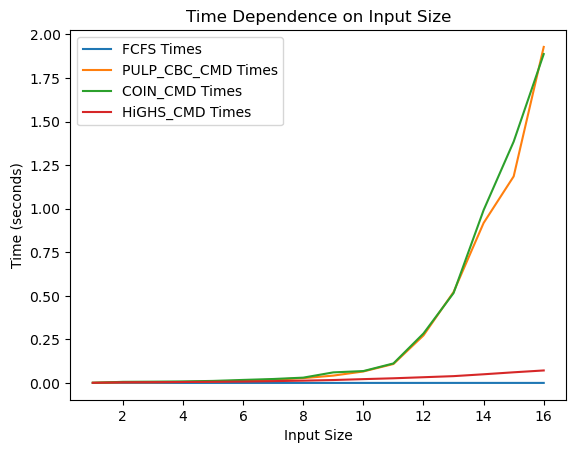

In [34]:
import matplotlib.pyplot as plt

input_sizes = [len(instance.entries) // 2 for instance in instances]

plt.plot(input_sizes, fcfs_times, label="FCFS Times")
for solver_name in pulp.listSolvers(onlyAvailable=True):
    if solver_name == "GLPK_CMD":
        continue
    plt.plot(input_sizes, solver_times[solver_name], label=f"{solver_name} Times")
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("Time Dependence on Input Size")
plt.legend()
plt.show()